In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

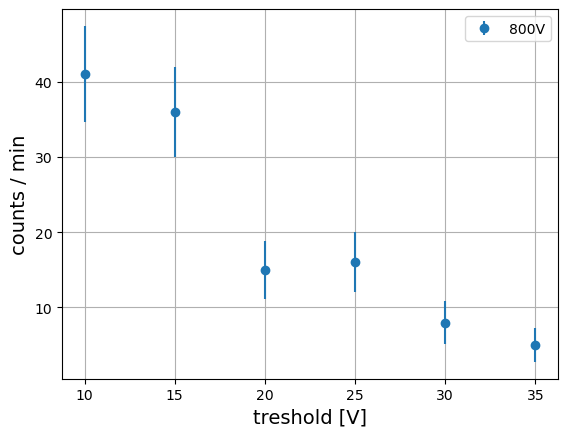

In [7]:
bias = 800
thr=[10, 15, 20, 25, 30, 35]
counts=np.array([41, 36, 15, 16, 8, 5])
error=np.sqrt(counts)


plt.errorbar(thr, counts, yerr=error, fmt='o', label='800V')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('counts / min', size=14)
plt.legend()
plt.grid()

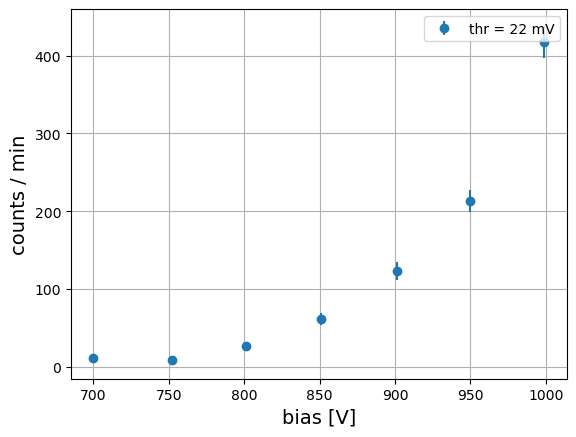

In [14]:
thr = 22
bias=[700, 752, 801, 851, 901, 950, 999]
counts=np.array([11, 9, 26, 61, 123, 213, 418])
error=np.sqrt(counts)


plt.errorbar(bias, counts, yerr=error, fmt='o', label='thr = 22 mV')
plt.xlabel('bias [V]', size=14)
plt.ylabel('counts / min', size=14)
plt.legend()
plt.grid()

(-100.0, 500.0)

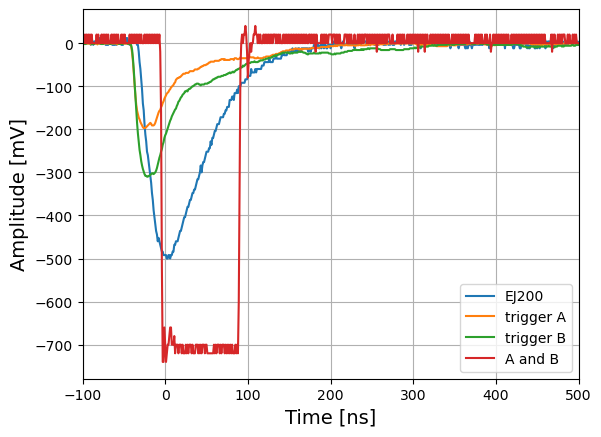

In [113]:
d=df.query('frame==14')
plt.plot(d.t1*1E9, d.a1*1000, label='EJ200')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
plt.plot(d.t4*1E9, d.a4*1000, label='A and B')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 5E2)

(-50.0, 200.0)

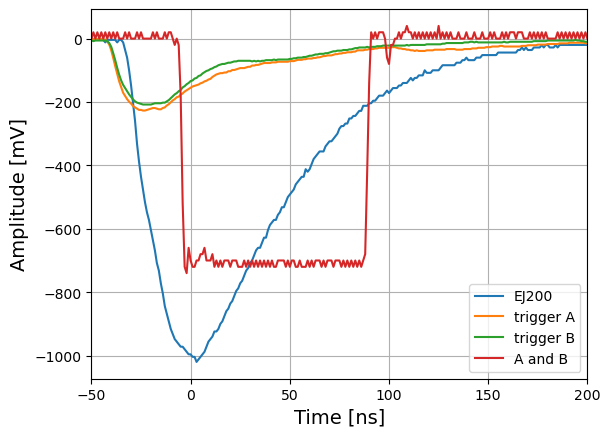

In [114]:
d=df.query('frame==15')
plt.plot(d.t1*1E9, d.a1*1000, label='EJ200')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
plt.plot(d.t4*1E9, d.a4*1000, label='A and B')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-0.5E2, 2E2)

Text(0, 0.5, 'Amplitude [mV]')

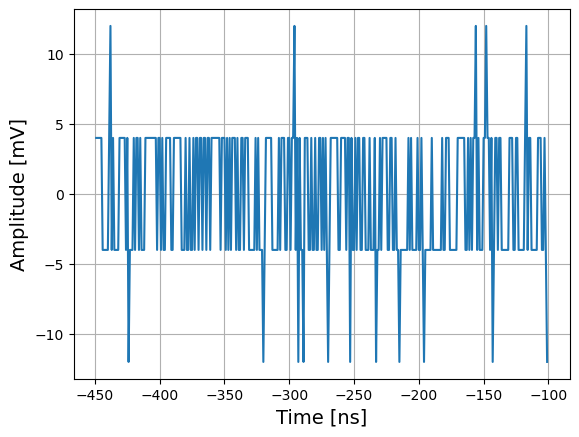

In [115]:
d=df.query('frame==15')
plt.plot(d.query('-450<(t1*10**9)<-100').t1*1E9, d.query('-450<(t1*10**9)<-100').a1*1000, label='plastic')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-0.5E2, 2E2)

Text(0, 0.5, 'Amplitude [mV]')

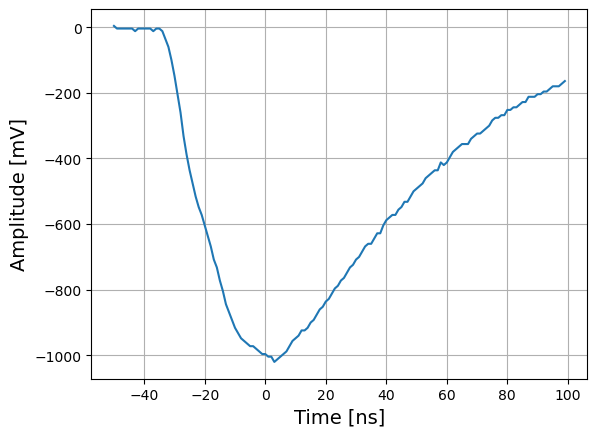

In [116]:
d=df.query('frame==15')
plt.plot(d.query('-50<(t1*10**9)<100').t1*1E9, d.query('-50<(t1*10**9)<100').a1*1000, label='plastic')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-0.5E2, 2E2)

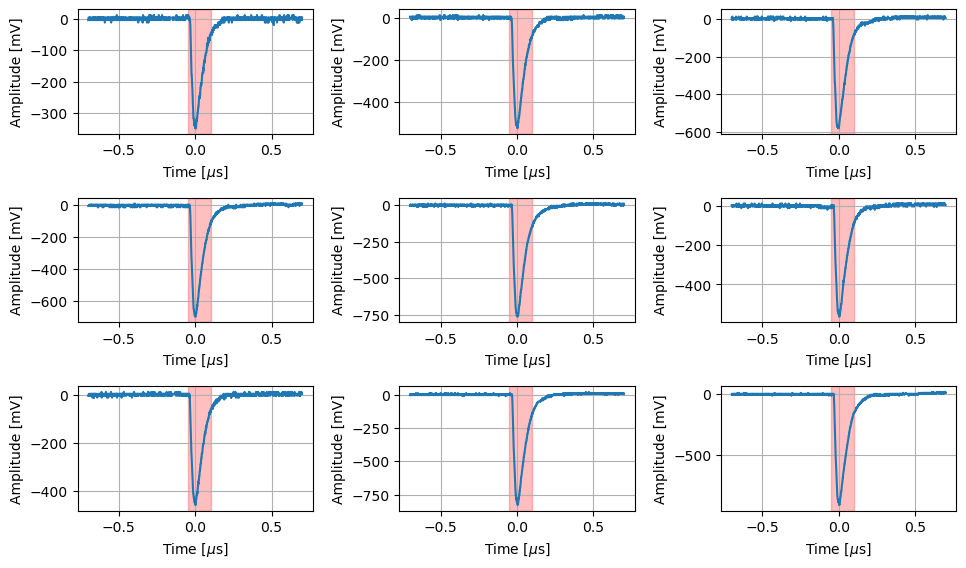

In [117]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 2*math.ceil(len(FRAMES)/plots_per_row)))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [118]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_13836\2063448300.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


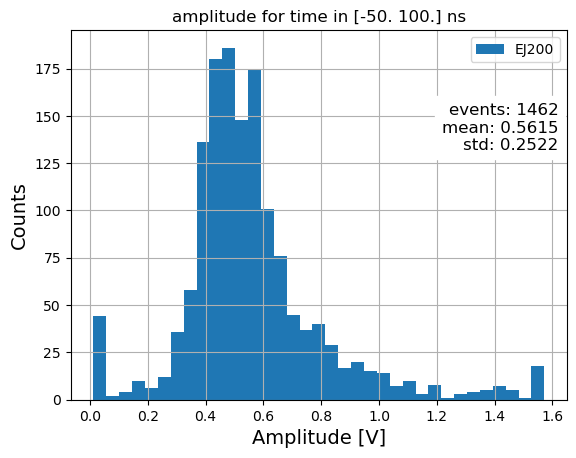

In [120]:
plt.hist(AMP, bins=35, label='EJ200')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

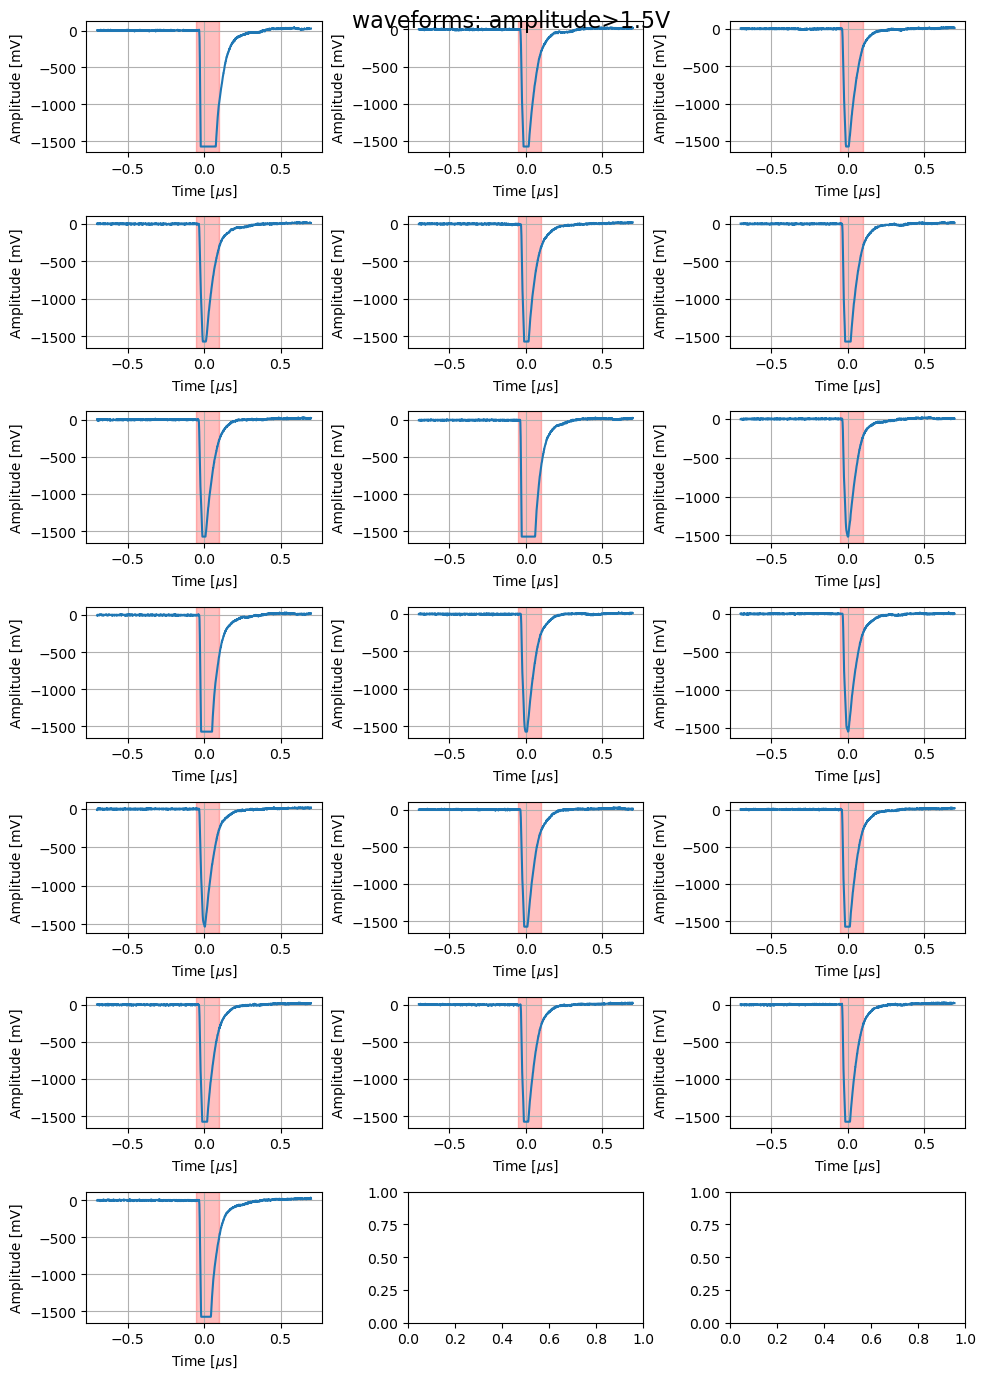

In [53]:
#%matplotlib widget
cut=1.5
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, math.ceil(len(FRAMES)/plots_per_row)*2))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


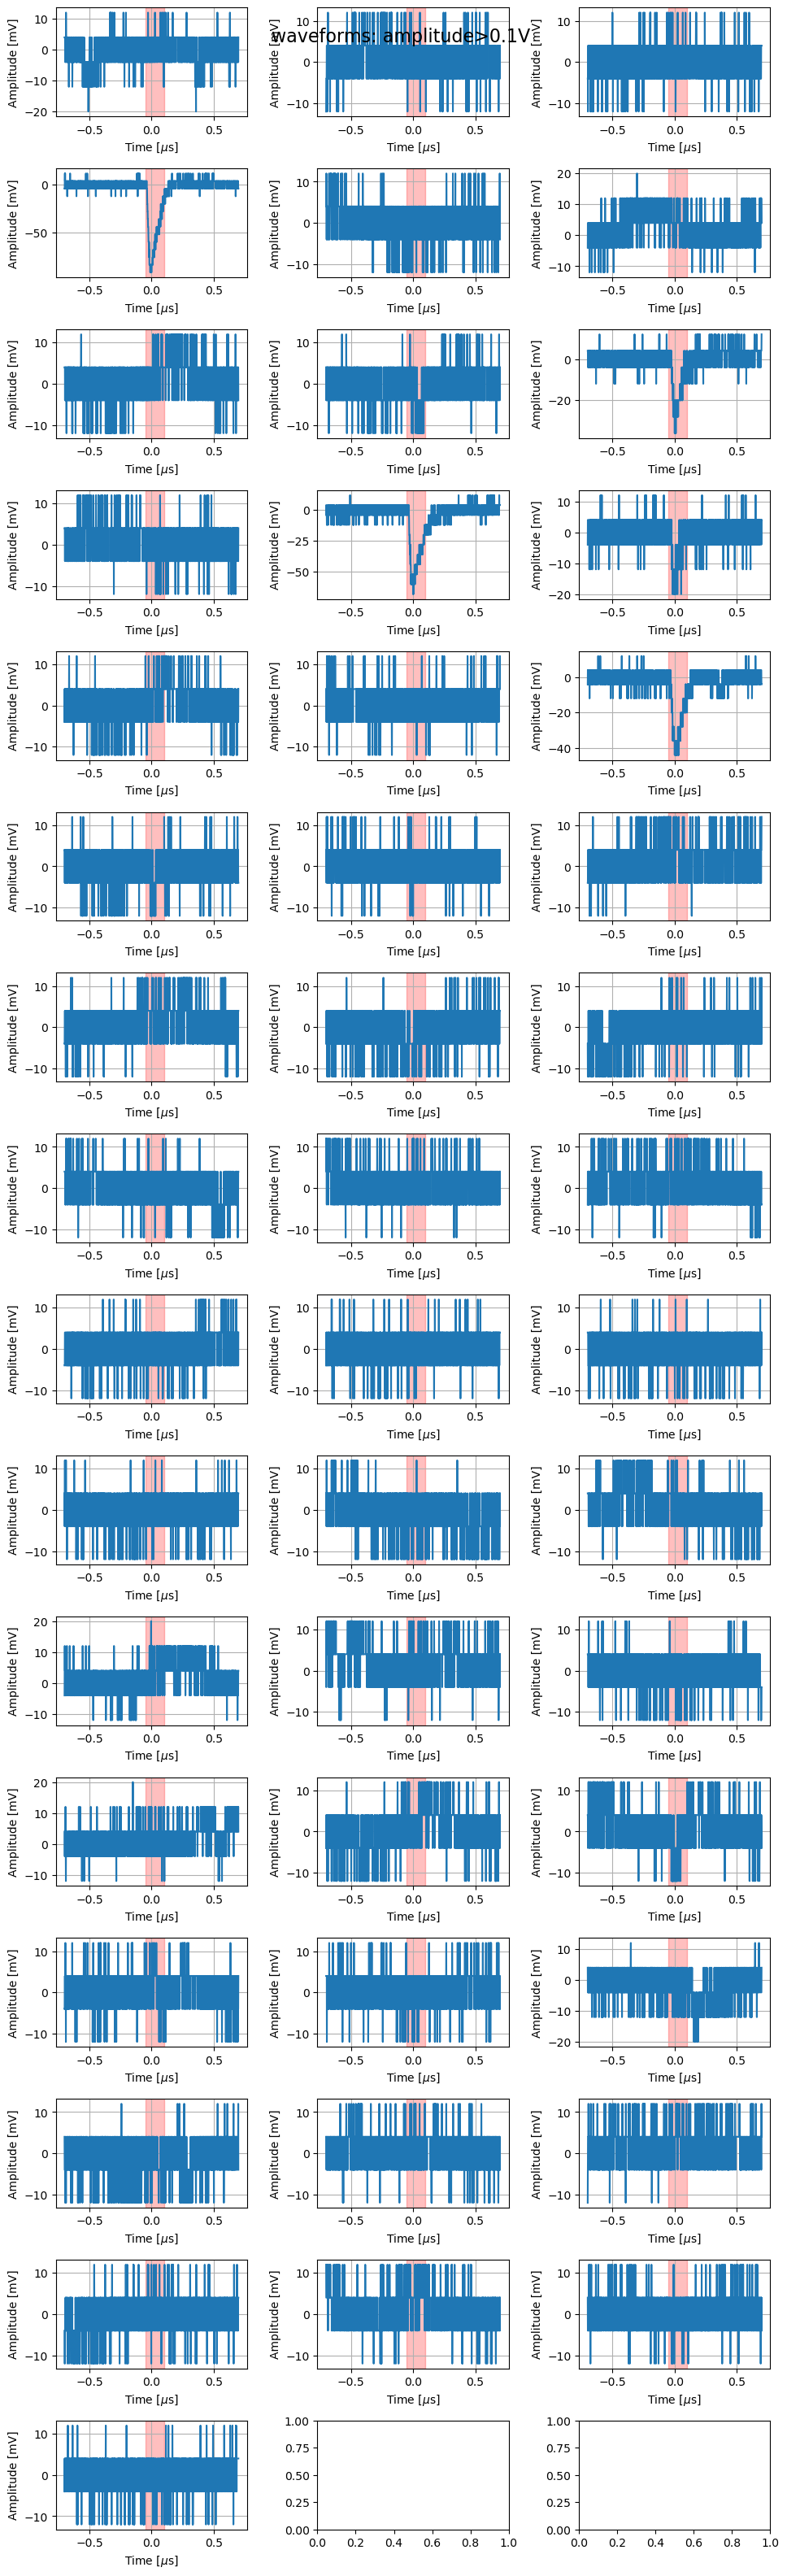

In [54]:
#%matplotlib widget
cut=0.1
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP<cut]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, math.ceil(len(FRAMES)/plots_per_row)*2))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


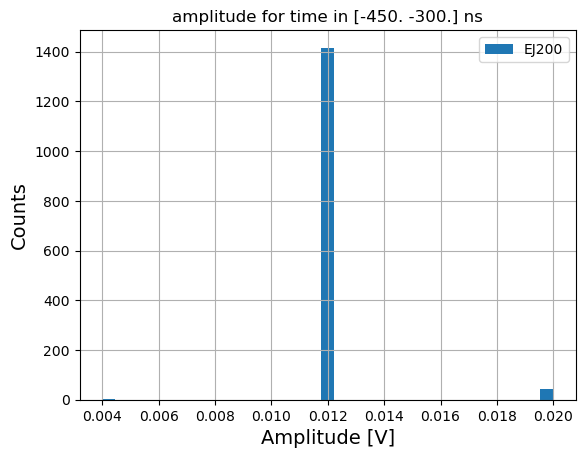

In [42]:
AMP = []
IND = []
timerange=np.array([-450E-9, -300E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)


plt.hist(AMP, bins=35, label='EJ200')
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

## nanocal

In [121]:
df = pd.read_csv('data/marco/20230217_test_nanoc1_con_telescopio.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [122]:
df

,frame,t1,a1,t2,a2,t3,a3,t4,a4
0,1.0,-7.000000e-07,0.0002,-7.000000e-07,-0.003,-7.000000e-07,-0.002,-7.000000e-07,0.00
1,1.0,-6.990000e-07,0.0006,-6.990000e-07,-0.003,-6.990000e-07,-0.002,-6.990000e-07,0.00
2,1.0,-6.980000e-07,0.0010,-6.980000e-07,-0.003,-6.980000e-07,-0.002,-6.980000e-07,0.00
3,1.0,-6.970000e-07,0.0014,-6.970000e-07,-0.003,-6.970000e-07,-0.002,-6.970000e-07,0.02
4,1.0,-6.960000e-07,0.0014,-6.960000e-07,-0.003,-6.960000e-07,-0.002,-6.960000e-07,0.00
...,...,...,...,...,...,...,...,...,...
608995,435.0,6.950000e-07,0.0018,6.950000e-07,-0.003,6.950000e-07,-0.006,6.950000e-07,0.00
608996,435.0,6.960000e-07,0.0014,6.960000e-07,-0.001,6.960000e-07,-0.006,6.960000e-07,0.00
608997,435.0,6.970000e-07,0.0014,6.970000e-07,-0.003,6.970000e-07,-0.004,6.970000e-07,0.00
608998,435.0,6.980000e-07,0.0014,6.980000e-07,-0.001,6.980000e-07,-0.004,6.980000e-07,0.02


(-100.0, 500.0)

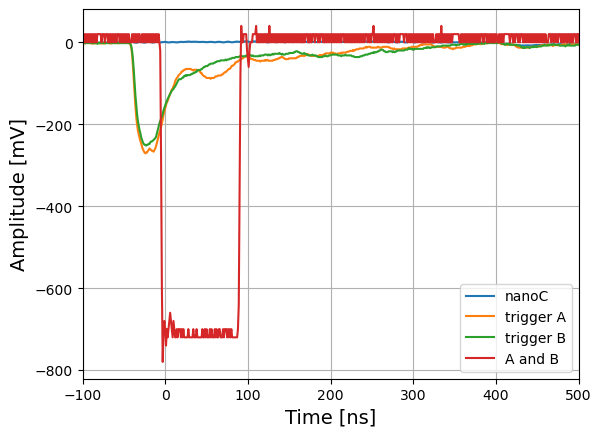

In [123]:
d=df.query('frame==14')
plt.plot(d.t1*1E9, d.a1*1000, label='nanoC')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
plt.plot(d.t4*1E9, d.a4*1000, label='A and B')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-1E2, 5E2)

(-50.0, 200.0)

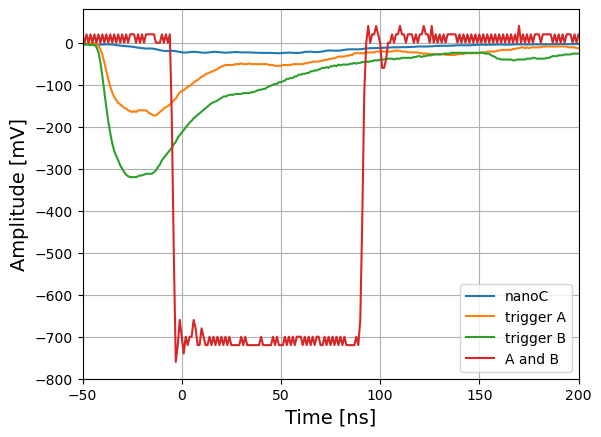

In [124]:
d=df.query('frame==15')
plt.plot(d.t1*1E9, d.a1*1000, label='nanoC')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
plt.plot(d.t4*1E9, d.a4*1000, label='A and B')
#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-0.5E2, 2E2)

Text(0, 0.5, 'Amplitude [mV]')

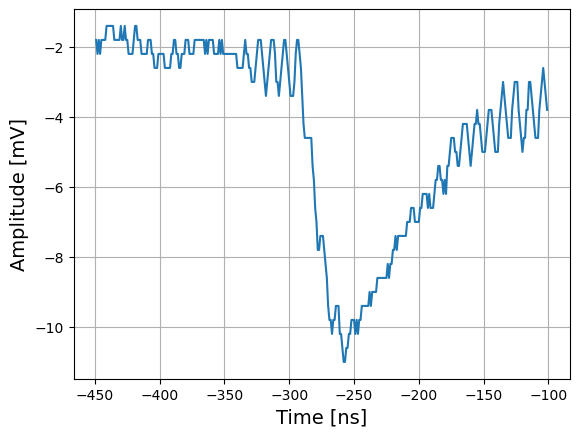

In [125]:
d=df.query('frame==15')
plt.plot(d.query('-450<(t1*10**9)<-100').t1*1E9, d.query('-450<(t1*10**9)<-100').a1*1000, label='plastic')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-0.5E2, 2E2)

Text(0, 0.5, 'Amplitude [mV]')

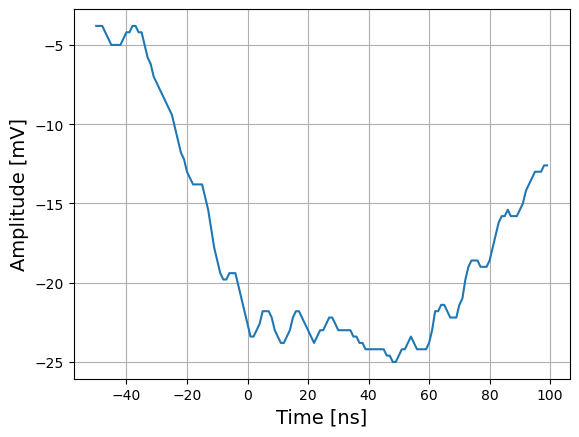

In [126]:
d=df.query('frame==15')
plt.plot(d.query('-50<(t1*10**9)<100').t1*1E9, d.query('-50<(t1*10**9)<100').a1*1000, label='plastic')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-0.5E2, 2E2)

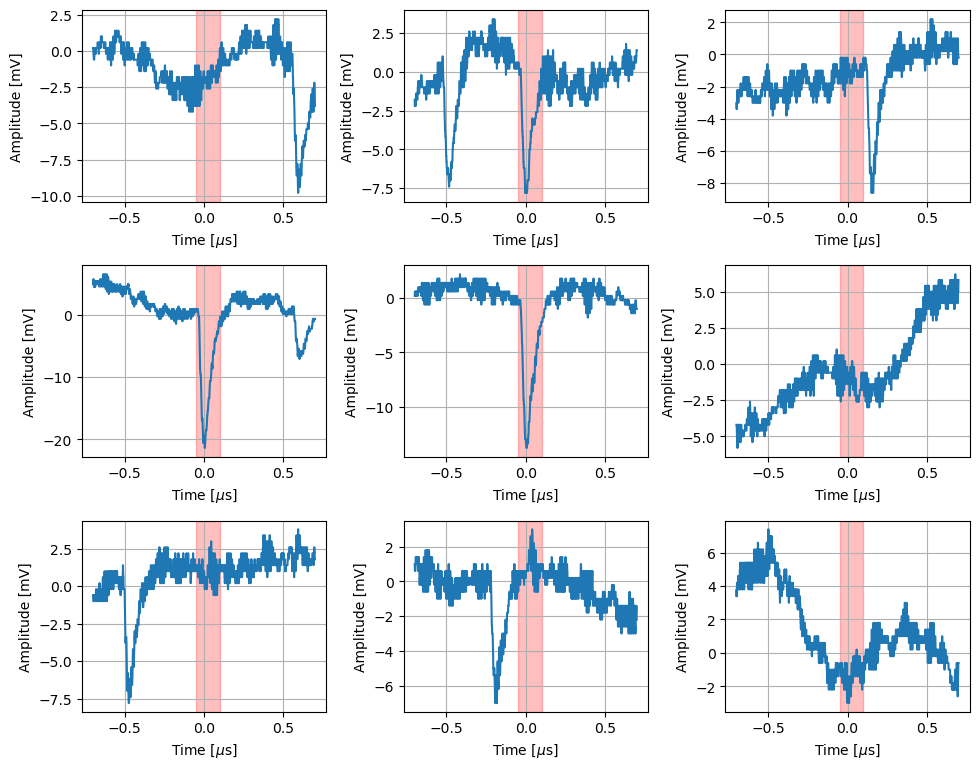

In [127]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [128]:
AMP = []
IND = []
timerange=np.array([-50E-9, 100E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_13836\579831165.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


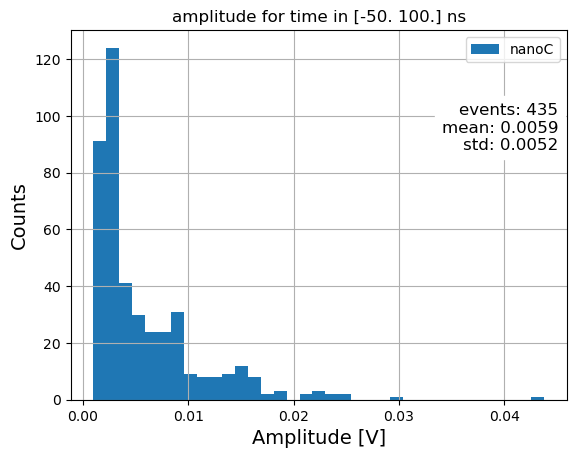

In [129]:
plt.hist(AMP, bins=35, label='nanoC')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


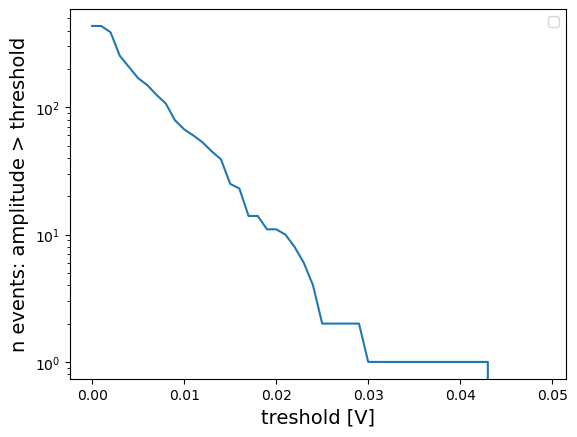

In [130]:
CUTS_IN = np.arange(0, 0.05, 0.001)
COUNTS_IN = []
for cut in CUTS_IN:
    COUNTS_IN+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, COUNTS_IN)
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('n events: amplitude > threshold', size=14)
plt.legend()

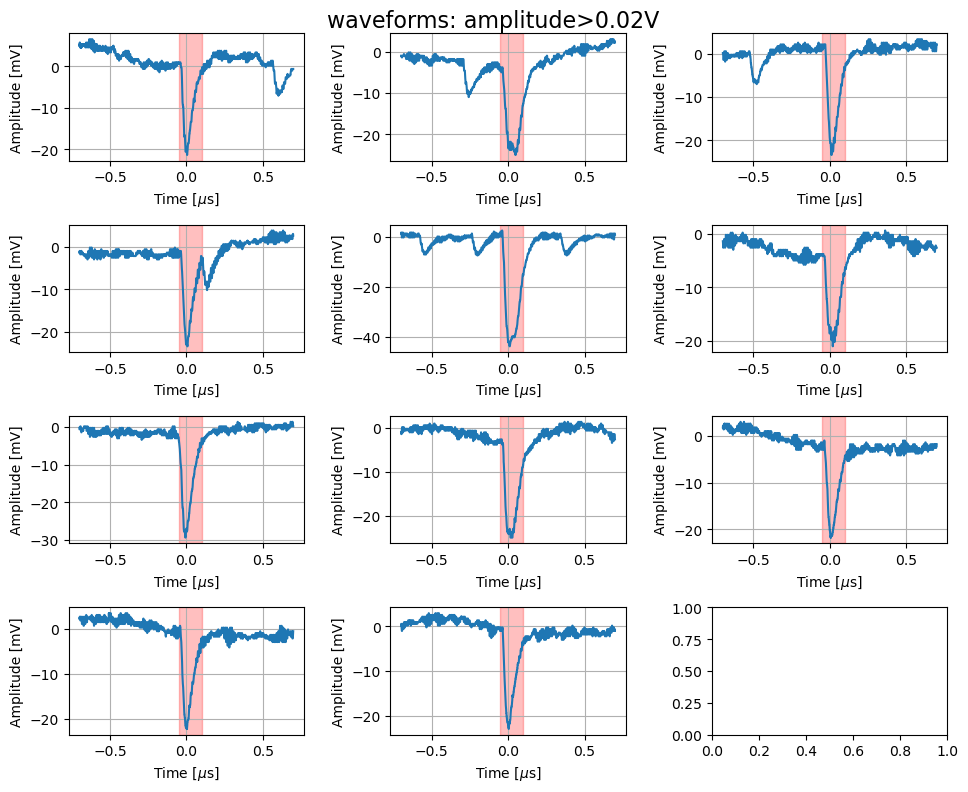

In [131]:
#%matplotlib widget
cut=0.02
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [132]:
AMP = []
IND = []
timerange=np.array([-450E-9, -300E-9])
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)



C:\Users\Belle2\AppData\Local\Temp\ipykernel_13836\1376524523.py:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


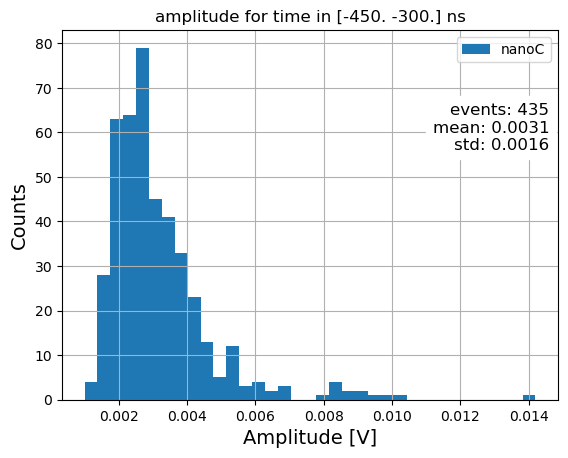

In [133]:
plt.hist(AMP, bins=35, label='nanoC')

counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)

plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)

#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()

plt.show()

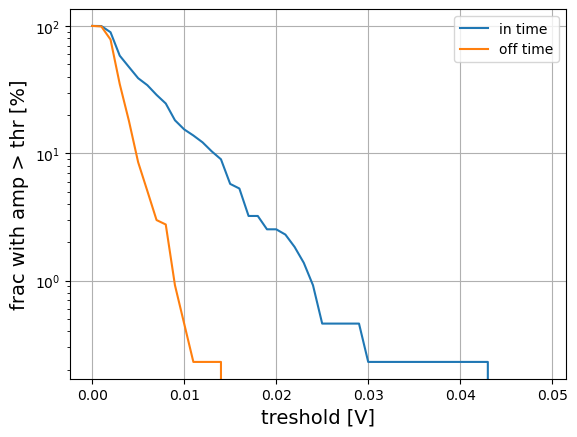

In [139]:
CUTS_OFF = np.arange(0, 0.05, 0.001)
COUNTS_OFF = []
for cut in CUTS_OFF:
    COUNTS_OFF+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, np.array(COUNTS_IN)/COUNTS_IN[0]*100, label='in time')
plt.plot(CUTS_OFF, np.array(COUNTS_OFF)/COUNTS_IN[0]*100, label='off time')
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('frac with amp > thr [%]', size=14)
plt.legend()
plt.grid()

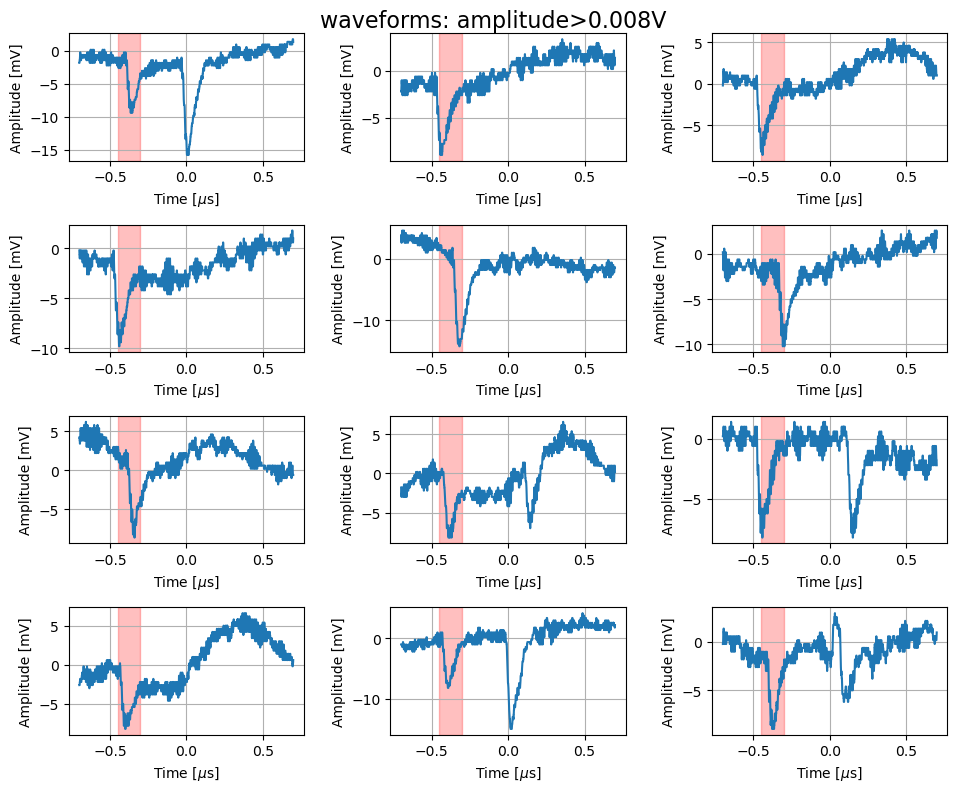

In [135]:
#%matplotlib widget
cut=0.008
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='BGO')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()
